In [30]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Carregar o dataset Diabetes
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target)

X.head(), y.head()

(        age       sex       bmi        bp        s1        s2        s3  \
 0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 
          s4        s5        s6  
 0 -0.002592  0.019907 -0.017646  
 1 -0.039493 -0.068332 -0.092204  
 2 -0.002592  0.002861 -0.025930  
 3  0.034309  0.022688 -0.009362  
 4 -0.002592 -0.031988 -0.046641  ,
 0    151.0
 1     75.0
 2    141.0
 3    206.0
 4    135.0
 dtype: float64)

In [31]:
from sklearn.model_selection import train_test_split

# Dividir o dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
from sklearn.tree import DecisionTreeRegressor

# Definir o modelo
model = DecisionTreeRegressor(random_state=42)

In [33]:
from sklearn.model_selection import GridSearchCV

# Definir a grade de hiperparâmetros
param_grid = {
    'max_depth': [None] + list(range(1, 10, 1)),
    'min_samples_leaf': range(1, 10, 1),
    'max_leaf_nodes': list(range(2, 50, 3))
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [34]:
# Executar o GridSearchCV
grid_search.fit(X_train, y_train)

# Obter os melhores hiperparâmetros
best_params = grid_search.best_params_
best_params

{'max_depth': None, 'max_leaf_nodes': 8, 'min_samples_leaf': 8}

In [35]:
# Treinar o modelo com os melhores hiperparâmetros
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=8, min_samples_leaf=8, random_state=42)

In [36]:
# Prever no conjunto de teste
y_pred = best_model.predict(X_test)

# Avaliar a performance do modelo
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(3278.780894744709, 0.3926280161545931)

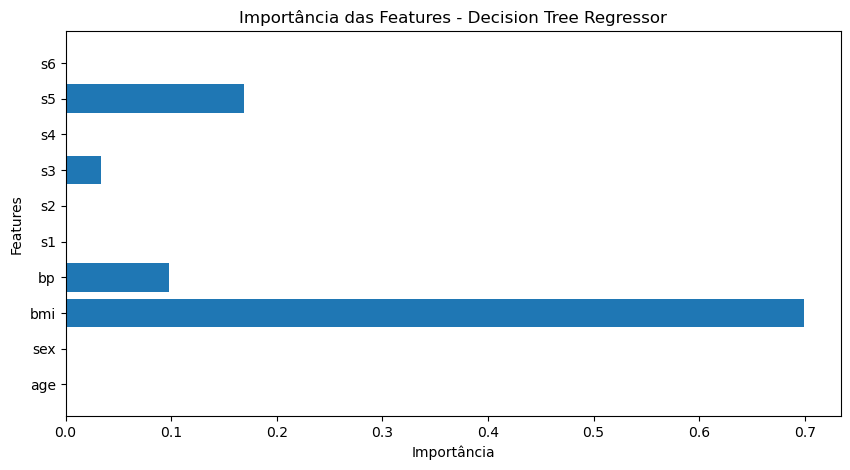

In [37]:
import matplotlib.pyplot as plt

# Importância das features
importances = best_model.feature_importances_

# Plotar as importâncias
plt.figure(figsize=(10,5))
plt.barh(diabetes.feature_names, importances)
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features - Decision Tree Regressor')
plt.show()

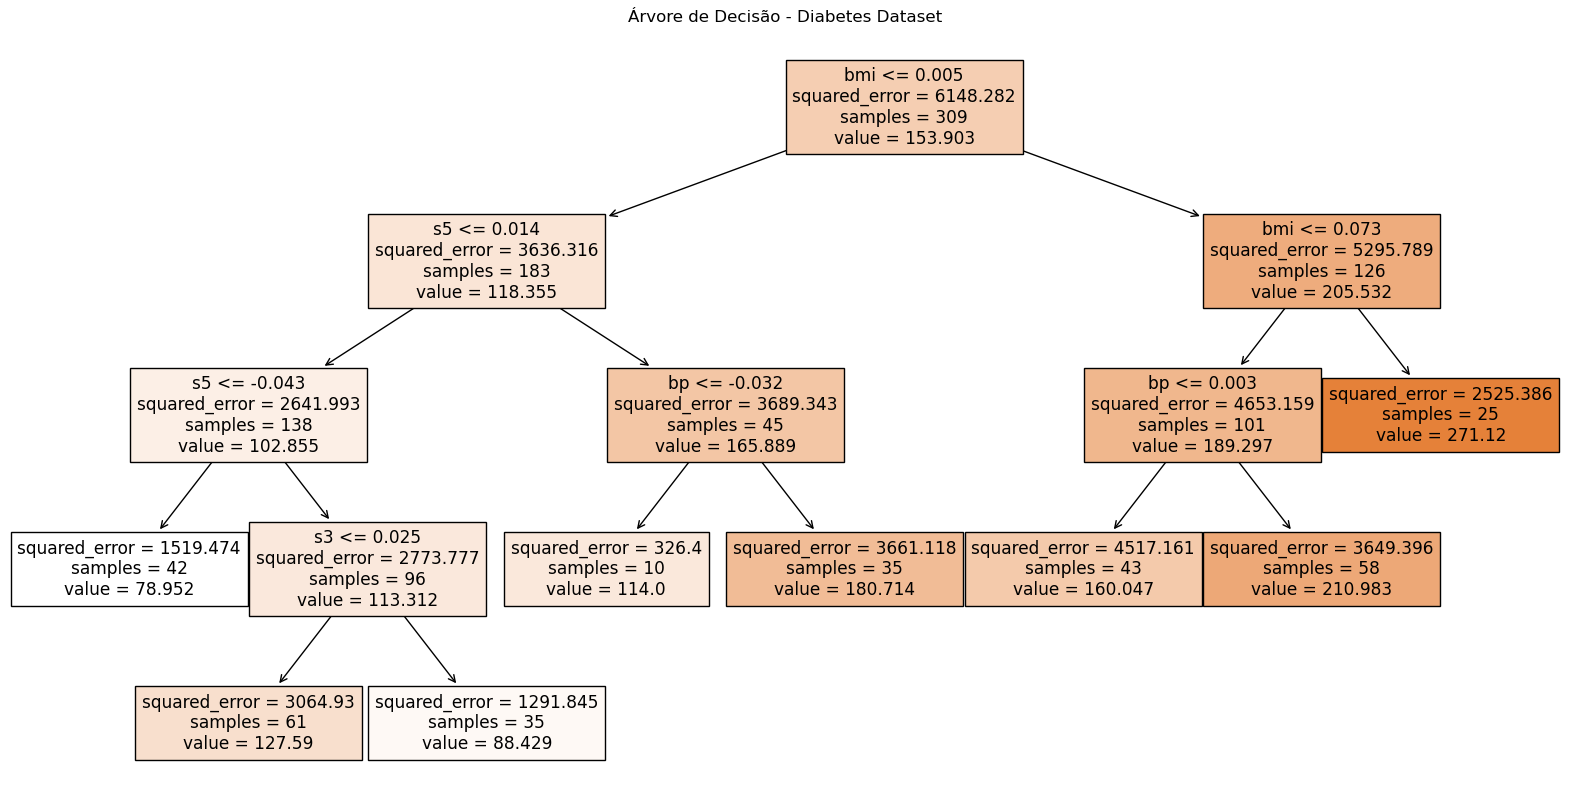

In [42]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=diabetes.feature_names, filled=True)
plt.title("Árvore de Decisão - Diabetes Dataset")
plt.show()

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


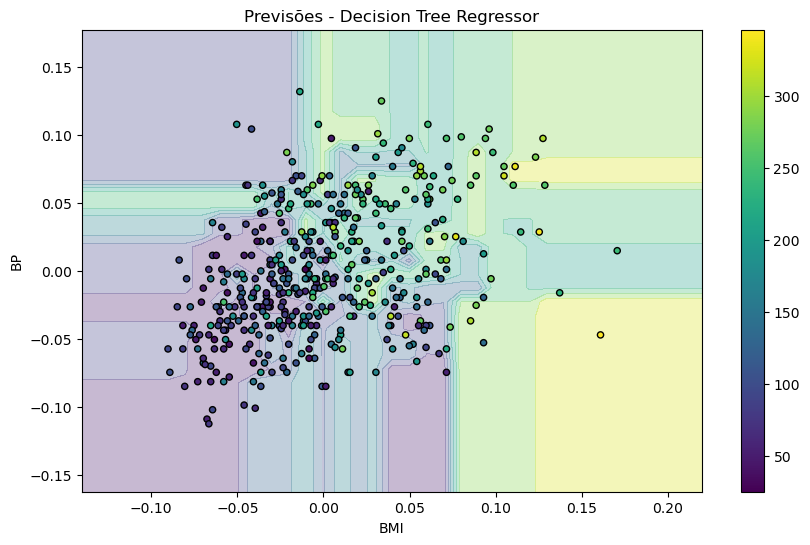

In [49]:
import numpy as np
# Selecionar duas features para visualização
# Aqui escolhemos arbitrariamente 'bmi' e 'bp'
X_reduced = X[['bmi', 'bp']]

# Dividir o dataset em conjuntos de treino e teste
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Treinar o modelo com duas features
model_reduced = DecisionTreeRegressor(random_state=42)
model_reduced.fit(X_train_reduced, y_train)

# Gerar uma grade de pontos com uma margem menor
x_min, x_max = X_reduced.iloc[:, 0].min() - 0.05, X_reduced.iloc[:, 0].max() + 0.05
y_min, y_max = X_reduced.iloc[:, 1].min() - 0.05, X_reduced.iloc[:, 1].max() + 0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Prever em cada ponto da grade
Z = model_reduced.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotar as previsões (não fronteiras de decisão)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X_reduced.iloc[:, 0], X_reduced.iloc[:, 1], c=y, edgecolor='k', s=20, cmap='viridis')
plt.colorbar()
plt.xlabel('BMI')
plt.ylabel('BP')
plt.title('Previsões - Decision Tree Regressor')
plt.show()